In [10]:
from pathlib import Path
import os
import sys
sys.path.append(Path(os.path.abspath('')).parent)

import pandas as pd 
import numpy as np

from tqdm.notebook import tqdm

import config.config as cfg 

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

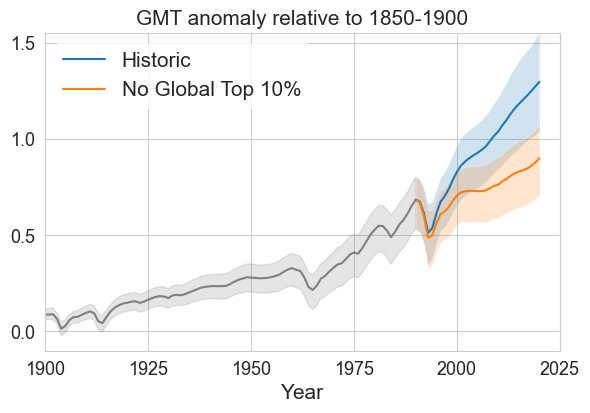

In [11]:
magicc_df = pd.read_csv(cfg.PROCESSED_GMT_DIR / 'MAGICC-GMT_processed.csv')

color_map = dict(zip(['ssp245', 'World_p90p100_equal-scaling', 'World_p99p100_equal-scaling', 'World_p999p100_equal-scaling'], ['C0', 'C1', 'C2', 'C3']))
label_map = dict(zip(['ssp245', 'World_p90p100_equal-scaling', 'World_p99p100_equal-scaling', 'World_p999p100_equal-scaling'], ['Historic', 'No Global Top 10%', 'No Top 1%', 'No Top 0.1%']))


with sns.axes_style('whitegrid'):
    plt.figure(figsize = (6,4))
    for scenario in list(color_map.keys())[:2]:
        sub_df = magicc_df[magicc_df.scenario == scenario]
        plt.fill_between(np.arange(1990,2021,1), np.quantile(sub_df.iloc[:, 7:].values.T[190:,:], q = 0.05, axis = 1), np.quantile(sub_df.iloc[:, 7:].values.T[190:,:], q = 0.95, axis = 1), alpha = .2)
        plt.plot(np.arange(1990,2021,1), np.mean(sub_df.iloc[:, 7:].values.T[190:,:], axis = 1), color = color_map[scenario], label = label_map[scenario])
    plt.fill_between(np.arange(1800,1991,1), np.quantile(sub_df.iloc[:, 7:].values.T[:191,:], q = 0.05, axis = 1), np.quantile(sub_df.iloc[:, 7:].values.T[:191,:], q = 0.95, axis = 1), alpha = .2, color = 'grey')
    plt.plot(np.arange(1800,1991,1), np.mean(sub_df.iloc[:, 7:].values.T[:191,:], axis = 1), color = 'grey')
    plt.xlim(1900, 2025)
    plt.ylim(-0.1,1.55)
    plt.legend(frameon = True, edgecolor = 'none', facecolor = (1,1,1,.7), loc = 'upper left', fontsize = 15)
    plt.xlabel('Year', fontsize = 15)
    plt.xticks([1900, 1925, 1950, 1975, 2000, 2025], fontsize = 13)
    plt.yticks([0,0.5,1,1.5], fontsize = 13)
    plt.tight_layout()
    plt.title('GMT anomaly relative to 1850-1900', fontsize = 15)
    plt.show()

In [7]:
from scipy.stats import ttest_1samp

for region in ['IN', 'EU27', 'CN', 'US', 'World']:
    for group in ['p99p100', 'p999p100']:  
        print(region, group)
        print(
            ttest_1samp(magicc_df[magicc_df.scenario == 'ssp245'].iloc[:, -1].values-magicc_df[magicc_df.scenario == f'{region}_{group}_CO2-scaling'].iloc[:, -1].values, 0)
                )

IN p99p100
Ttest_1sampResult(statistic=105.08612275064993, pvalue=0.0)
IN p999p100
Ttest_1sampResult(statistic=106.0165191930305, pvalue=0.0)
EU27 p99p100
Ttest_1sampResult(statistic=100.12800276975597, pvalue=0.0)
EU27 p999p100
Ttest_1sampResult(statistic=100.6747530742526, pvalue=0.0)
CN p99p100
Ttest_1sampResult(statistic=106.09498076259938, pvalue=0.0)
CN p999p100
Ttest_1sampResult(statistic=107.01979086170732, pvalue=0.0)
US p99p100
Ttest_1sampResult(statistic=100.71064430914694, pvalue=0.0)
US p999p100
Ttest_1sampResult(statistic=101.62341270233544, pvalue=0.0)
World p99p100
Ttest_1sampResult(statistic=99.58609292963843, pvalue=0.0)
World p999p100
Ttest_1sampResult(statistic=101.51030585977539, pvalue=0.0)


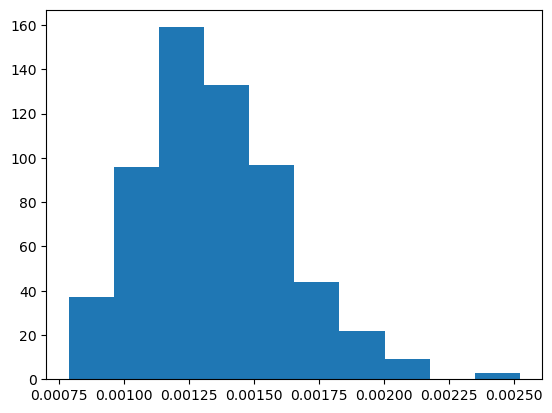

In [9]:
plt.figure()
plt.hist(magicc_df[magicc_df.scenario == 'ssp245'].iloc[:, -1].values-magicc_df[magicc_df.scenario == f'IN_{group}_equal-scaling'].iloc[:, -1].values)
plt.show()